Khai báo thư viện cần thiết

In [11]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

Khai báo đường dẫn tệp dữ liệu

In [2]:
# set names to the paths because they're too long
data_path = 'D:/Code/python/mat3533/project/data/'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Hàm lấy dữ liệu 

In [3]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

Lấy dữ liệu train và test từ tệp dữ liệu

In [4]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 60000)
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


Chuẩn hóa dữ liệu

In [5]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_images)
test_x = scaler.fit_transform(test_images)
print(train_x.shape)

(60000, 784)


Sử dụng mô hình Multinomial Logistic Regression để phân loại hình ảnh

In [8]:
model = LogisticRegression(multi_class='multinomial')
model.fit(train_x, train_labels)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Sử dụng mô hình đã huấn luyện dự đoán tập dữ liệu test

In [9]:
pred_labels = model.predict(test_x)
pred_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Trực quan một số dự đoán của mô hình

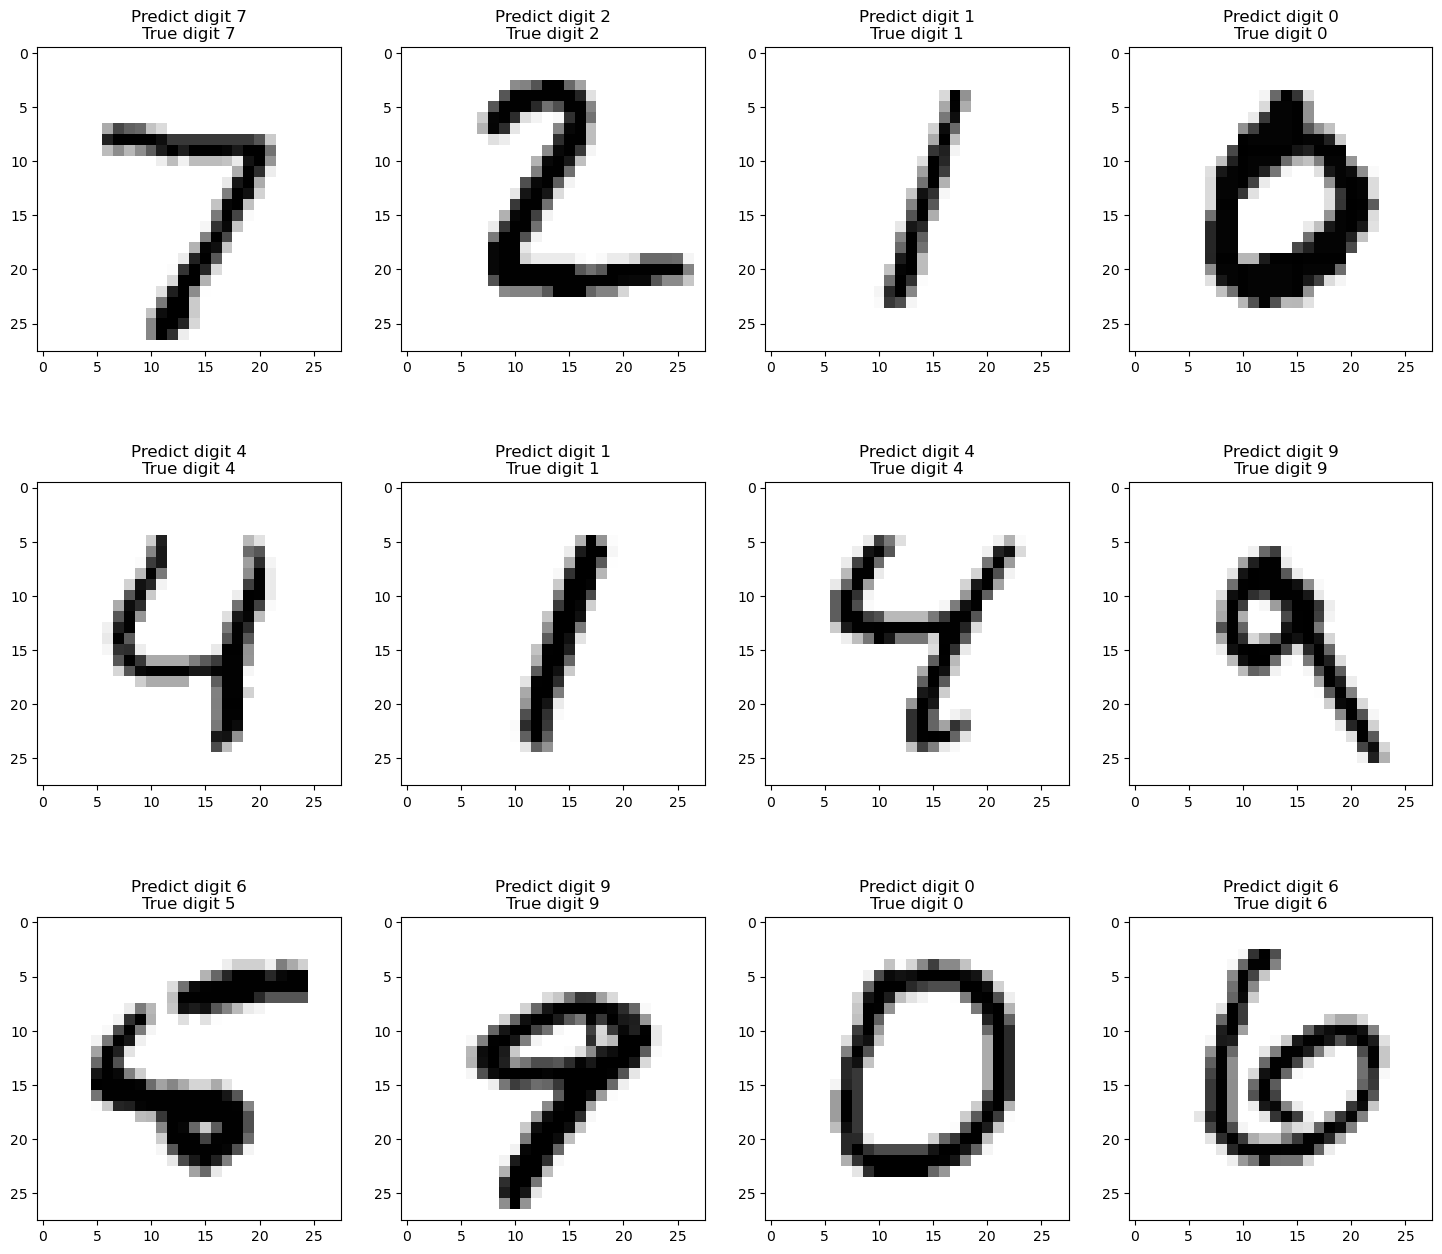

In [10]:
fig, axis = plt.subplots(3, 4, figsize=(18, 16))

for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predict digit {0}\nTrue digit {1}".format(pred_labels[i], test_labels[i]))

In [12]:
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy:", accuracy)

confusion_matrix = confusion_matrix(test_labels, pred_labels)
print("Confusion Matrix:")
print(confusion_matrix)

precision = precision_score(test_labels, pred_labels, average='macro')
print("Precision:", precision)

recall = recall_score(test_labels, pred_labels, average='macro')
print("Recall:", recall)

Accuracy: 0.9234
Confusion Matrix:
[[ 954    0    2    2    2   10    6    2    2    0]
 [   0 1110    7    2    0    2    3    1   10    0]
 [   9   12  923   17   10    4   12    8   34    3]
 [   4    1   18  924    3   24    2   10   18    6]
 [   1    3    8    3  913    1    8    8    6   31]
 [   9    5    3   28    9  781   15    8   30    4]
 [   9    4    9    4    7   19  902    1    3    0]
 [   2    8   22    7    6    2    0  947    3   31]
 [   9   12    4   23    8   27    9   11  856   15]
 [   6    7    2   10   22    8    0   23    7  924]]
Precision: 0.9224781240261617
Recall: 0.9223329448419355
